In [33]:
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#specify "matplotlib notebook" for resizeable inline plots:
# works in jupyter notebook
%matplotlib notebook 
# works in vs code; may need to "pip install ipympl"
#%matplotlib widget

# reload modules without reloading explicitly
import importlib
%load_ext autoreload
%autoreload 2

from the EI dashboard, scroll to "Download block output" and
1. download Image training data
2. download Image training labels


In [3]:
!ls

ei-knobhead-image-X.npy  ei-knobhead-image-y.json show_sample_labels.ipynb


In [4]:
IMAGE_FILE="ei-knobhead-image-X.npy"
LABEL_FILE="ei-knobhead-image-y.json"

In [5]:
img_array = np.load(IMAGE_FILE)
img_array.shape

(72, 409600)

In [6]:
with open(LABEL_FILE, "r") as f:
    label_d = json.load(f)
for k in label_d.keys():
    print(k)
print(len(label_d['samples']))

version
samples
72


In [47]:
def showimage(img, bb_l = []):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.axis('off')

    for bb in bb_l:
        x = bb['x']
        y = bb['y']
        w = bb['w']
        h = bb['h']
        rect = plt.Rectangle((x,y), w, h, fill=False, edgecolor='r')
        ax.add_patch(rect)
    
    plt.show()

<IPython.core.display.Javascript object>


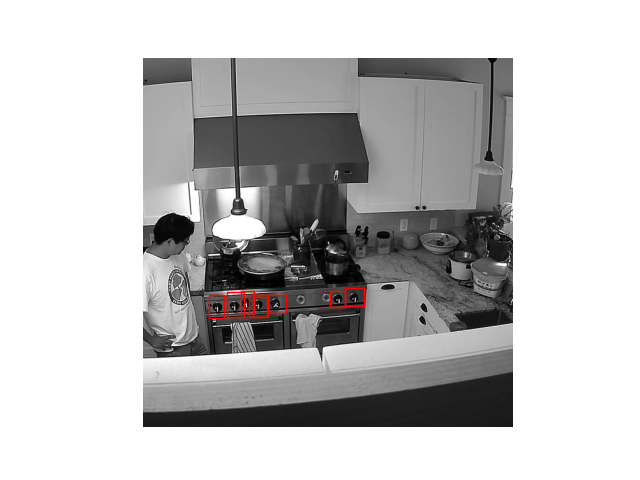

In [73]:
IMAGE_INDEX=12
LABEL_INDEX=IMAGE_INDEX
img = img_array[IMAGE_INDEX,:].reshape(640,640)
bb_l = label_d['samples'][LABEL_INDEX]['boundingBoxes']
showimage(img, bb_l)